# Curva ROC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import exp, log
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
#Carga de paquetería para ciencia de datos
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#Definición de vectores de prueba
y_verd = [0,1,0,0,1,1,0,1,1,0]
y_prob = [0.22788576,0.74417354,0.0942964,0.26138511,0.79943,0.72501024,0.25000763,0.82837856,0.86182719,0.20760795]

In [3]:
#Funciones auxiliares (Parte 1)
def FunClasificacion(yVerd,yProb):
    y_0, y_1 = [], []
    for i in range(len(yVerd)):
        if yVerd[i] == 0:
            y_0.extend([yProb[i]])
        elif yVerd[i] == 1:
             y_1.extend([yProb[i]])
    return [y_0,y_1]
#Ejemplo
[y_0,y_1] = FunClasificacion(y_verd,y_prob)
print(y_0)
print(y_1)

[0.22788576, 0.0942964, 0.26138511, 0.25000763, 0.20760795]
[0.74417354, 0.79943, 0.72501024, 0.82837856, 0.86182719]


In [4]:
#Funciones auxiliares (Parte 2)
def FunDist(yProb_,y0,y1):
    yProb = yProb_.copy()
    yProb.sort()
    n, n0, n1 = len(yProb), len(y0), len(y1)
    vdist_0, vdist_1 = [], []
    for i in range(n):
        #Cálculo de la distribución para el caso Etiqueta 0
        cont_0 = 0
        for j in range(n0):
            if y0[j] >= yProb[i]:
                cont_0 = cont_0 + 1
        vdist_0.extend([cont_0/n0])
        #Cálculo de la distribución para el caso Etiqueta 1
        cont_1 = 0
        for j in range(n1):
            if y1[j] >= yProb[i]:
                cont_1 = cont_1 + 1
        vdist_1.extend([cont_1/n1])
    return [vdist_0,vdist_1]
#Ejemplo
[vdist_0,vdist_1] = FunDist(y_prob,y_0,y_1)
print(vdist_0)
print(vdist_1)

[1.0, 0.8, 0.6, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.6, 0.4, 0.2]


# Ejemplo 1. Clasificación totalmente correcta

In [5]:
y_verd = [0,1,0,0,1,1,0,1,1,0]
y_prob = [0.22788576,0.74417354,0.0942964,0.26138511,0.79943,0.72501024,0.25000763,0.82837856,0.86182719,0.20760795]
M = pd.DataFrame(index=range(len(y_verd)),columns=["Clasificacion_Verdadera","Probabilidad_Asignacion"])
M["Clasificacion_Verdadera"], M["Probabilidad_Asignacion"] = y_verd, y_prob
M

,Clasificacion_Verdadera,Probabilidad_Asignacion
0,0,0.227886
1,1,0.744174
2,0,0.094296
3,0,0.261385
4,1,0.799430
5,1,0.725010
6,0,0.250008
7,1,0.828379
8,1,0.861827
9,0,0.207608


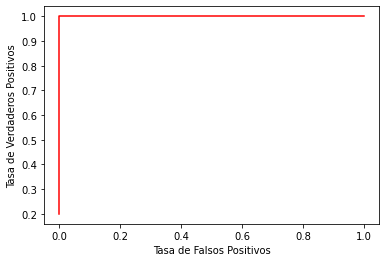

In [6]:
#Curva ROC
[y_0,y_1] = FunClasificacion(y_verd,y_prob)
[vdist_0,vdist_1] = FunDist(y_prob,y_0,y_1)
#Gráfica
plt.plot(vdist_0, vdist_1, color="red", linestyle= "-")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

# Ejemplo 2. Clasificación con pocos errores

In [7]:
y_verd = [0,1,0,0,1,1,0,1,1,0]
y_prob = [0.6,0.74417354,0.0942964,0.26138511,0.1,0.72501024,0.25000763,0.82837856,0.86182719,0.20760795]
M = pd.DataFrame(index=range(len(y_verd)),columns=["Clasificacion_Verdadera","Probabilidad_Asignacion"])
M["Clasificacion_Verdadera"], M["Probabilidad_Asignacion"] = y_verd, y_prob
M

,Clasificacion_Verdadera,Probabilidad_Asignacion
0,0,0.600000
1,1,0.744174
2,0,0.094296
3,0,0.261385
4,1,0.100000
5,1,0.725010
6,0,0.250008
7,1,0.828379
8,1,0.861827
9,0,0.207608


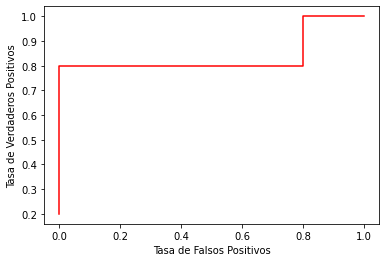

In [8]:
#Curva ROC
[y_0,y_1] = FunClasificacion(y_verd,y_prob)
[vdist_0,vdist_1] = FunDist(y_prob,y_0,y_1)
#Gráfica
plt.plot(vdist_0, vdist_1, color="red", linestyle= "-")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

# Ejemplo 3. Clasificación con muchos errores

In [9]:
y_verd = [0,1,0,0,1,1,0,1,1,0]
y_prob = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.46,0.47]
M = pd.DataFrame(index=range(len(y_verd)),columns=["Clasificacion_Verdadera","Probabilidad_Asignacion"])
M["Clasificacion_Verdadera"], M["Probabilidad_Asignacion"] = y_verd, y_prob
M

,Clasificacion_Verdadera,Probabilidad_Asignacion
0,0,0.10
1,1,0.15
2,0,0.20
3,0,0.25
4,1,0.30
5,1,0.35
6,0,0.40
7,1,0.45
8,1,0.46
9,0,0.47


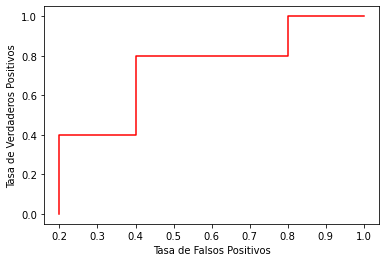

In [10]:
#Curva ROC
[y_0,y_1] = FunClasificacion(y_verd,y_prob)
[vdist_0,vdist_1] = FunDist(y_prob,y_0,y_1)
#Gráfica
plt.plot(vdist_0, vdist_1, color="red", linestyle= "-")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

# Clasificación totalmente incorrecta

In [11]:
y_verd = [0,1,0,0,1,1,0,1,1,0]
y_prob = [0.6,0.4,0.7,0.8,0.1,0.3,0.9,0.2,0.25,0.95]
M = pd.DataFrame(index=range(len(y_verd)),columns=["Clasificacion_Verdadera","Probabilidad_Asignacion"])
M["Clasificacion_Verdadera"], M["Probabilidad_Asignacion"] = y_verd, y_prob
M

,Clasificacion_Verdadera,Probabilidad_Asignacion
0,0,0.60
1,1,0.40
2,0,0.70
3,0,0.80
4,1,0.10
5,1,0.30
6,0,0.90
7,1,0.20
8,1,0.25
9,0,0.95


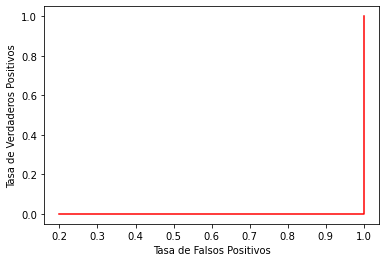

In [12]:
#Curva ROC
[y_0,y_1] = FunClasificacion(y_verd,y_prob)
[vdist_0,vdist_1] = FunDist(y_prob,y_0,y_1)
#Gráfica
plt.plot(vdist_0, vdist_1, color="red", linestyle= "-")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

# Comparativo entre la curva ROC proporcionada por Python y la calculada internamente

In [13]:
#Cálculo interno (datos del Ejemplo 2)
y_verd = [0,1,0,0,1,1,0,1,1,0]
y_prob = [0.6,0.74417354,0.0942964,0.26138511,0.1,0.72501024,0.25000763,0.82837856,0.86182719,0.20760795]
[y_0,y_1] = FunClasificacion(y_verd,y_prob)
[vdist_0,vdist_1] = FunDist(y_prob,y_0,y_1)
#Cálculo Python
x_tasa, y_tasa, _ = roc_curve(y_verd, y_prob)

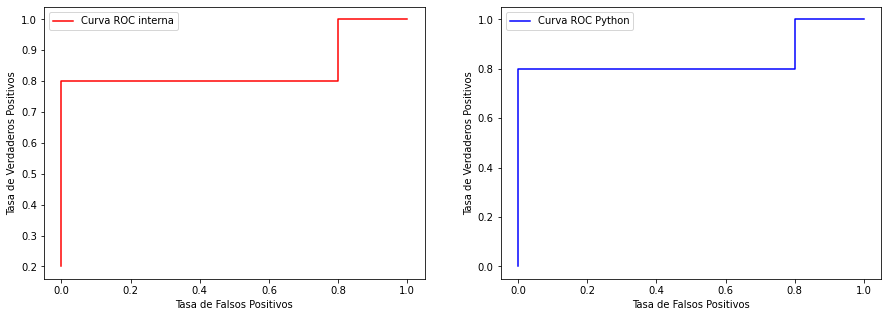

In [14]:
#Gráficas
fig = plt.figure(figsize=(15.,5.))
ax = fig.add_subplot(1,2,1)
plt.plot(vdist_0, vdist_1, color="red", linestyle= "-",label="Curva ROC interna")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='best')
ax = fig.add_subplot(1,2,2)
plt.plot(x_tasa, y_tasa, color="blue", linestyle= "-",label="Curva ROC Python")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='best')
plt.show()

In [15]:
#Área bajo la curva
#Cálculo interno del área bajo la curva
area1 = 0.8*0.8 + 1*0.2
print("El área bajo la curva sin utilizar la función de Python es igual a ",area1)
#Cálculo mediante Python del área bajo la curva
area2 = roc_auc_score(y_verd, y_prob)
print("El área bajo la curva mediante la función de Python es igual a ",area2)

El área bajo la curva sin utilizar la función de Python es igual a  0.8400000000000001
El área bajo la curva mediante la función de Python es igual a  0.8400000000000001


# Curva ROC con base en el tamaño de la muestra

In [16]:
#Ejemplo función "train_test_split"
x = [[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8],[9.9],[10,10]]
y = [10,20,30,40,50,60,70,80,90,100]
x_entre, x_test, y_entre, y_test = train_test_split(x, y, test_size=0.2,random_state=2)
#x_entre, x_test, y_entre, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
print(x_entre)
print(x_test)
print(y_entre)
print(y_test)

[[6, 6], [1, 1], [8, 8], [3, 3], [4, 4], [7, 7], [10, 10], [9.9]]
[[5, 5], [2, 2]]
[60, 10, 80, 30, 40, 70, 100, 90]
[50, 20]


In [20]:
M = pd.read_csv("../data/EjemploRegresionLogistica4D_Nolineal.csv",dtype='str',encoding = "ISO-8859-1")
#M = pd.read_csv("C:\\Users\\ricardo\\Desktop\\BanxicoTrabajoCasa_v3\\CursoCienciaDeDatos\\Clases\\RegresionLogistica\\EjemploRegresionLogistica4D.csv",dtype='str',encoding = "ISO-8859-1")
M[["Y","X1","X2","X3","X4"]] = M[["Y","X1","X2","X3","X4"]].astype(float)
M.head()

,Y,X1,X2,X3,X4
0,1.0,0.580465,0.186298,0.776026,0.175751
1,1.0,0.957676,0.886382,0.418673,0.284228
2,1.0,0.277571,0.143721,0.878732,0.229771
3,0.0,0.073976,0.518592,0.799081,0.115999
4,1.0,0.196895,0.575175,0.523324,0.902436


In [ ]:
#Separación de la muestra con diversas proporciones
tam_a, tam_b, tam_c = 0.5, 0.3, 0.1
x_entre_a, x_test_a, y_entre_a, y_test_a = train_test_split(M[["X1","X2","X3","X4"]], M[["Y"]], test_size=tam_a,random_state=1)
x_entre_b, x_test_b, y_entre_b, y_test_b = train_test_split(M[["X1","X2","X3","X4"]], M[["Y"]], test_size=tam_b,random_state=1)
x_entre_c, x_test_c, y_entre_c, y_test_c = train_test_split(M[["X1","X2","X3","X4"]], M[["Y"]], test_size=tam_c,random_state=1)
print("La longitud de de los vectores de verificación al 50% es",len(y_test_a))
print("La longitud de de los vectores de verificación al 70% es",len(y_test_b))
print("La longitud de de los vectores de verificación al 90% es",len(y_test_c))

In [ ]:
#Entrenamiento simple
#a) Entrenamiento con un a% de la muestra
LR = LogisticRegression()
LR.fit(x_entre_a, y_entre_a)
y_pred_a = LR.predict_proba(x_test_a)[:,1]
#b) Entrenamiento con un b% de la muestra
LR = LogisticRegression()
LR.fit(x_entre_b, y_entre_b)
y_pred_b = LR.predict_proba(x_test_b)[:,1]
#c) Entrenamiento con un c% de la muestra
LR = LogisticRegression()
LR.fit(x_entre_c, y_entre_c)
y_pred_c = LR.predict_proba(x_test_c)[:,1]

In [ ]:
#Cálculo de curvas ROC
x_tasa_a, y_tasa_a, _ = roc_curve(y_test_a, y_pred_a)
x_tasa_b, y_tasa_b, _ = roc_curve(y_test_b, y_pred_b)
x_tasa_c, y_tasa_c, _ = roc_curve(y_test_c, y_pred_c)
fig = plt.figure(figsize=(5.,5.))
ax = fig.add_subplot(1,1,1)
plt.plot(x_tasa_a, y_tasa_a, color="red", linestyle= "-",label="Curva ROC " + str(round(1-tam_a,2)))
plt.plot(x_tasa_b, y_tasa_b, color="blue", linestyle= "-",label="Curva ROC " + str(round(1-tam_b,2)))
plt.plot(x_tasa_c, y_tasa_c, color="green", linestyle= "-",label="Curva ROC " + str(round(1-tam_c,2)))
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='best',ncol=2)
plt.show()

In [ ]:
#Impresión de área bajo la curva
print("El área bajo la curva considerando una proporción de entrenamiento de ",round(1-tam_a,2)," es igual a ",roc_auc_score(y_test_a, y_pred_a))
print("El área bajo la curva considerando una proporción de entrenamiento de ",round(1-tam_b,2)," es igual a ",roc_auc_score(y_test_b, y_pred_b))
print("El área bajo la curva considerando una proporción de entrenamiento de ",round(1-tam_c,2)," es igual a ",roc_auc_score(y_test_c, y_pred_c))

# Ejercicio. Aplicando un modelo de regresión logística a los datos de los archivos EjercicioRL_Lineal.csv y EjercicioRL_NoLineal.csv, y mediante el cálculo de sus correspondientes curvas ROC, discriminar en qué modelo la regresión logística tiene un mejor desempeño.

In [ ]:
M1 = pd.read_csv("../data/EjercicioRL_Lineal.csv",dtype='str',encoding = "ISO-8859-1")
M2 = pd.read_csv("../data/EjercicioRL_NoLineal.csv",dtype='str',encoding = "ISO-8859-1")
M[["Y","X1","X2","X3","X4"]] = M[["Y","X1","X2","X3","X4"]].astype(float)
M.head()